In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
! pip install pydub
from pydub import AudioSegment
import IPython

trainpath = 'moroccan-darija-trigger-word-classification-ed-2/data/train/'
for dirname, _, filenames in os.walk(trainpath):
    for filename in filenames:
        print(dirname + filename)

moroccan-darija-trigger-word-classification-ed-2/data/train/0p5dwnmxgabovt8u4hrf.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/4pg0yrcdhjvo73mtanxf.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/0y4whrmeixdalkz8s6bju.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/5wt2u8abqh3lds4k9ivj.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/5dqlz0onixs9phy2vwm1b.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/3zebh15sl6djpx4ri7g0u.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/5vnh0ky62o9d4sm8xbgzt.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/46khm1wtnip8zeb7doj0.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/90b6ciwo78v5etprzq2h.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/32bixqwuv5anmtgzl8cj.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/7xbwc2u3o8fiyhgrzqsv1.wav
moroccan-darija-trigger-word-classification-ed-2/data/train/

Display an audio 

In [ ]:
IPython.display.Audio(trainpath  + 'k1xcfnu6vwm3p8y5lior2.wav')


### Importing data

In [ ]:
import librosa
import pandas as pd
import os


metadata=pd.read_csv('moroccan-darija-trigger-word-classification-ed-2/train.csv')
metadata.head()


,id,label
0,gudj6np7lx4ov5a9y3wq,1
1,mi2z51y4jb7thxuf8ldr,1
2,ziuab84tvf07snxjhyodp,0
3,ulcdyxnbz6jqh9wmk4pa,1
4,gj8rfxzae4vibtohk62n1,0


In [ ]:
metadata_test=pd.read_csv('moroccan-darija-trigger-word-classification-ed-2/test.csv')

In [ ]:
metadata_test.head()

,id
0,4s8mxnikbt0f61qu2ea5
1,wcr5syvak4mq0tozn6i3d
2,qt6vl4jushkf7g5webcym
3,i84wvt3sa7golhud9x1f
4,o6013rbhaz94tlqmg8nc


### Preprocessing audio

In [ ]:
x , sr = librosa.load(trainpath  + 'k1xcfnu6vwm3p8y5lior2.wav')

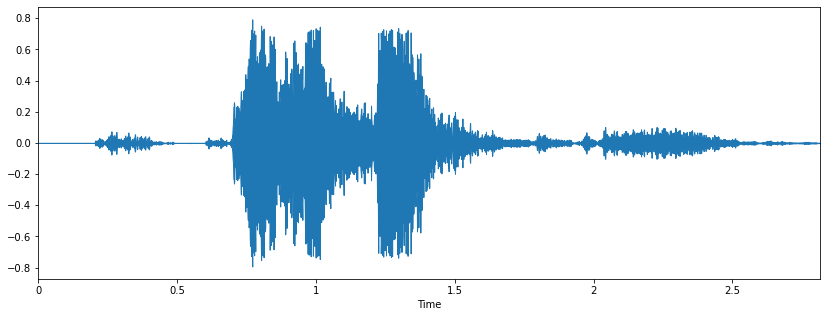

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

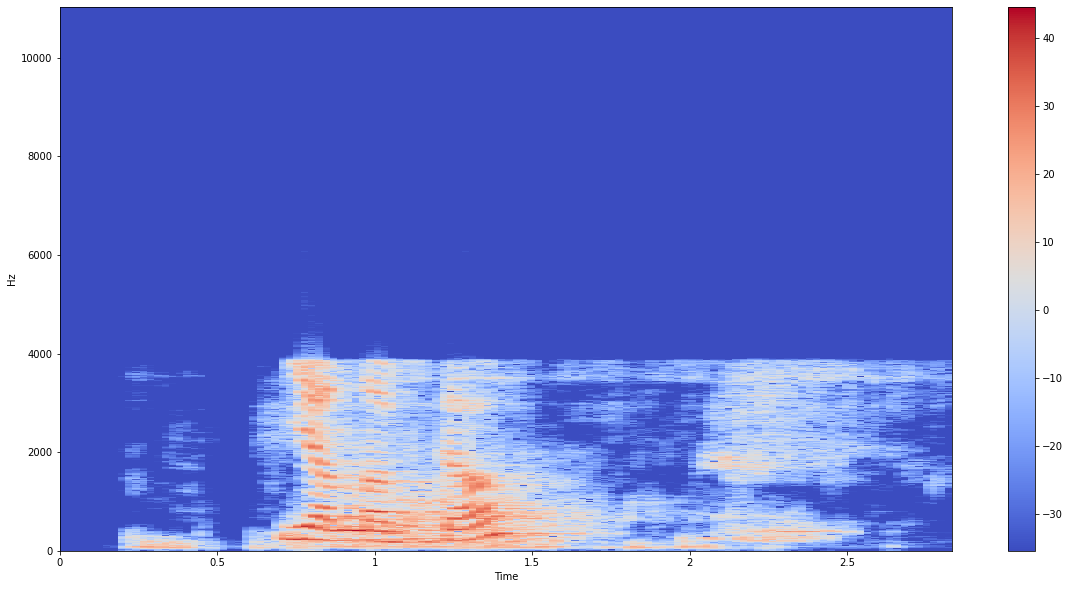

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 10))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()


(20, 216)


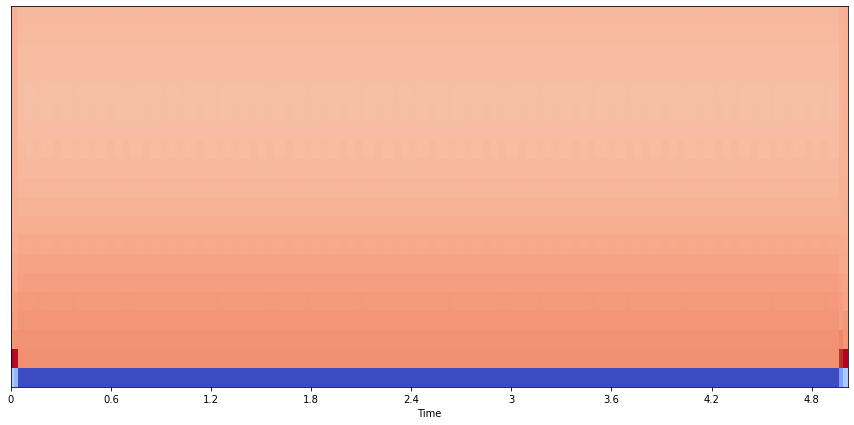

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [ ]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
     
    return mfccs_processed

In [ ]:
features = []
# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = trainpath + row["id"]+".wav"
    class_label = row["label"]
    data = extract_features(file_name)
    
    features.append([row["id"],data, class_label])
# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=["id",'feature','class_label'])

In [ ]:
features = []
testpath="moroccan-darija-trigger-word-classification-ed-2/data/test/"
# Iterate through each sound file and extract the features 
for index,row in metadata_test.iterrows():
    file_name = testpath + row["id"]+ ".wav"
    data = extract_features(file_name)
    features.append([row["id"],data])
# Convert into a Panda dataframe 
featuresdf_test = pd.DataFrame(features, columns=["id",'feature'])

In [ ]:
print (trainpath)

moroccan-darija-trigger-word-classification-ed-2/data/train/


In [ ]:

featuresdf_test.head()

,id,feature
0,4s8mxnikbt0f61qu2ea5,"[-552.4038, 84.40007, -2.5147567, -0.77165574,..."
1,wcr5syvak4mq0tozn6i3d,"[-463.52032, 58.235188, -20.056517, 23.958546,..."
2,qt6vl4jushkf7g5webcym,"[-426.41577, 85.48749, -15.445296, 17.00922, -..."
3,i84wvt3sa7golhud9x1f,"[-389.33893, 43.022488, -15.783303, 17.709093,..."
4,o6013rbhaz94tlqmg8nc,"[-432.20474, 54.857685, 10.85623, 24.556564, -..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())
# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(y)

In [ ]:
y

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
X_test=np.array(featuresdf_test.feature.tolist())

### Modeling

In [ ]:
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Activation, Dense,Dropout


In [ ]:
num_labels = yy.shape[1]
filter_size = 2
def build_model_graph(input_shape=(40,)):
    model = Sequential()
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_labels))
    model.add(Activation('softmax'))
    # Compile the model
    model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], optimizer='adam')
    return model
model = build_model_graph()

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 
num_epochs = 100
num_batch_size = 32
model.fit(X, y, batch_size=num_batch_size, epochs=num_epochs, verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 1s 5ms/step - loss: 26.0519 - accuracy: 0.4583
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 26.4374 - accuracy: 0.4861
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 19.3683 - accuracy: 0.5347
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 20.4888 - accuracy: 0.5069
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 17.5622 - accuracy: 0.4792
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 16.2496 - accuracy: 0.5208
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 10.4344 - accuracy: 0.5903
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 10.9153 - accuracy: 0.5000
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 12.1845 - accuracy: 0.5278
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 10.0334 - accuracy: 0.6111
Epoch 11/100
5/5 [=============

In [ ]:
model.summary()
# Calculate pre-training accuracy 
prediction = model.predict(X_test)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 256)               10496     
                                                                 
 activation_30 (Activation)  (None, 256)               0         
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 256)               65792     
                                                                 
 activation_31 (Activation)  (None, 256)               0         
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 2)               

### make prediction

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test)

In [ ]:
pred=[np.argmax(predictions[i]) for i in range(len(predictions))]

In [ ]:
metadata_test["label"]=pred

In [ ]:
metadata_test.to_csv("submission2.csv",index=False)